# Problem Statement

2.	 Divide the diabetes data into train and test datasets and build a Random Forest and Decision Tree model with Outcome as the output variable. 

 ------------------------ #### --------------------------

We will load necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.rcParams['figure.figsize']=(10,15)

In [3]:
data = pd.read_csv("Diabetes.csv")
data.shape

(768, 9)

We have 768 rows and 9 columns. Lets explore our dataset

In [4]:
data.columns

Index([' Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', ' Triceps skin fold thickness',
       ' 2-Hour serum insulin', ' Body mass index',
       ' Diabetes pedigree function', ' Age (years)', ' Class variable'],
      dtype='object')

In [7]:
data.dtypes

 Number of times pregnant          int64
 Plasma glucose concentration      int64
 Diastolic blood pressure          int64
 Triceps skin fold thickness       int64
 2-Hour serum insulin              int64
 Body mass index                 float64
 Diabetes pedigree function      float64
 Age (years)                       int64
 Class variable                   object
dtype: object

Lets check for any missing value in our dataset

<AxesSubplot:>

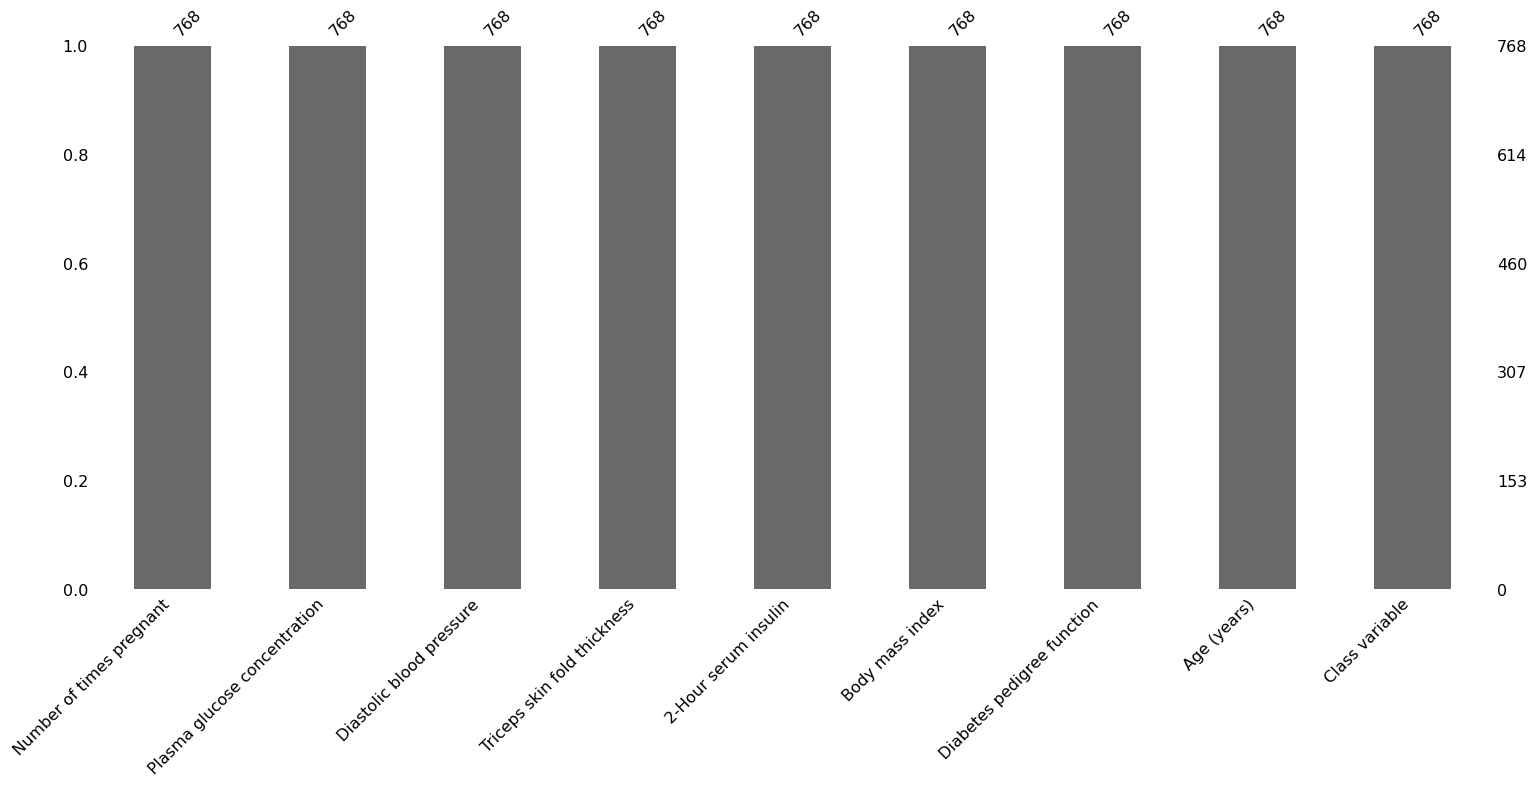

In [8]:
msno.bar(data)

In [9]:
data.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years)
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [11]:
data[' Class variable'].value_counts()

NO     500
YES    268
Name:  Class variable, dtype: int64

array([[<AxesSubplot:title={'center':' Number of times pregnant'}>,
        <AxesSubplot:title={'center':' Plasma glucose concentration'}>,
        <AxesSubplot:title={'center':' Diastolic blood pressure'}>],
       [<AxesSubplot:title={'center':' Triceps skin fold thickness'}>,
        <AxesSubplot:title={'center':' 2-Hour serum insulin'}>,
        <AxesSubplot:title={'center':' Body mass index'}>],
       [<AxesSubplot:title={'center':' Diabetes pedigree function'}>,
        <AxesSubplot:title={'center':' Age (years)'}>, <AxesSubplot:>]],
      dtype=object)

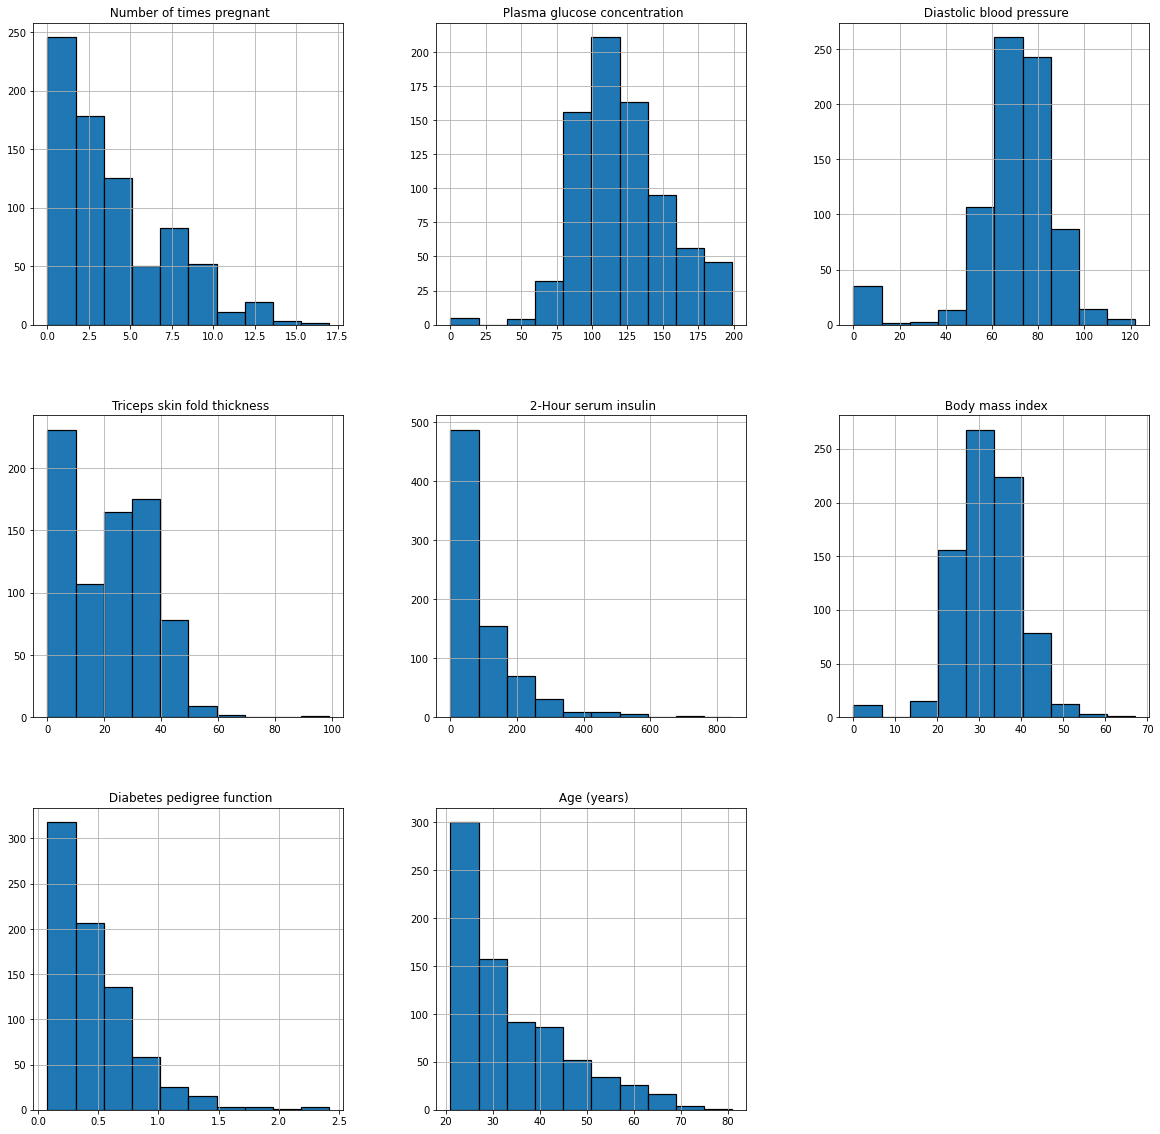

In [12]:
# Visulazing the distibution of the data for every feature
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20))

Lets build Decision Tree Model on our dataset

In [13]:
colnames = list(data.columns)

In [14]:
predictors = colnames[:8]
target = colnames[-1]

In [15]:
predictors

[' Number of times pregnant',
 ' Plasma glucose concentration',
 ' Diastolic blood pressure',
 ' Triceps skin fold thickness',
 ' 2-Hour serum insulin',
 ' Body mass index',
 ' Diabetes pedigree function',
 ' Age (years)']

In [16]:
target

' Class variable'

In [18]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.3)

In [19]:
from sklearn.tree import DecisionTreeClassifier as DT

In [20]:
model = DT(criterion = 'entropy')
model.fit(train[predictors], train[target])

DecisionTreeClassifier(criterion='entropy')

In [21]:
# Prediction on Train Data
preds = model.predict(train[predictors])
pd.crosstab(train[target], preds, rownames = ['Actual'], colnames = ['Predictions'])

Predictions,NO,YES
Actual,,
NO,340,0
YES,0,197


In [23]:
# prediction on Test data
preds = model.predict(test[predictors])
pd.crosstab(test[target], preds, rownames=['Actual'], colnames=['Predictions'])

Predictions,NO,YES
Actual,,
NO,125,35
YES,34,37


In [25]:
np.mean(preds==test[target]) # Test Data Accuracy

0.7012987012987013

Lets Use Pruning Method to see if it increases the accuracy

In [28]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data[' Class variable'] = lb.fit_transform(data[' Class variable'])

In [29]:
colnames = list(data.columns)

In [35]:
predictors = data.loc[:,data.columns!=' Class variable']
target = data[' Class variable']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.3, random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(537, 8) (231, 8) (537,) (231,)


In [37]:
from sklearn import tree
regtree = tree.DecisionTreeRegressor(max_depth=3)
regtree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [38]:
# Prediction
test_pred = regtree.predict(x_test)
train_pred = regtree.predict(x_train)

In [39]:
# Measuring accuracy
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
# Error on train dataset
mean_squared_error(y_train, train_pred)
r2_score(y_train, train_pred)

0.3539171848280178

In [41]:
# Error on test dataset
mean_squared_error(y_test, test_pred)
r2_score(y_test, test_pred)

0.16368160418983835

In [43]:
regtree = tree.DecisionTreeRegressor(max_depth=4)
regtree.fit(x_train,y_train)

# Prediction
test_pred = regtree.predict(x_test)
train_pred = regtree.predict(x_train)

# Error on train dataset
print("Train Error",mean_squared_error(y_train, train_pred))
print("Train Error",r2_score(y_train, train_pred))

# Error on test dataset
print("Test Error",mean_squared_error(y_test, test_pred))
print("Test Error",r2_score(y_test, test_pred))

Train Error 0.13299567772623008
Train Error 0.4236447568417655
Test Error 0.17713823766664197
Test Error 0.18641130141765527


In [44]:
regtree = tree.DecisionTreeRegressor(max_depth=5)
regtree.fit(x_train,y_train)

# Prediction
test_pred = regtree.predict(x_test)
train_pred = regtree.predict(x_train)

# Error on train dataset
print("Train Error",mean_squared_error(y_train, train_pred))
print("Train Error",r2_score(y_train, train_pred))

# Error on test dataset
print("Test Error",mean_squared_error(y_test, test_pred))
print("Test Error",r2_score(y_test, test_pred))

Train Error 0.11397974923357483
Train Error 0.5060529243675161
Test Error 0.1988539738413117
Test Error 0.08667181114251732


In [45]:
regtree = tree.DecisionTreeRegressor(max_depth=6)
regtree.fit(x_train,y_train)

# Prediction
test_pred = regtree.predict(x_test)
train_pred = regtree.predict(x_train)

# Error on train dataset
print("Train Error",mean_squared_error(y_train, train_pred))
print("Train Error",r2_score(y_train, train_pred))

# Error on test dataset
print("Test Error",mean_squared_error(y_test, test_pred))
print("Test Error",r2_score(y_test, test_pred))

Train Error 0.09565656862015481
Train Error 0.5854589727326287
Test Error 0.19405611663109273
Test Error 0.10870817356242568


Min Sample Split

In [47]:
regtree2 = tree.DecisionTreeRegressor(min_samples_split = 3)
regtree2.fit(x_train, y_train)

# Prediction
test_pred2 = regtree2.predict(x_test)
train_pred2 = regtree2.predict(x_train)

# Error on train dataset
print("Train Error with Mean Square",mean_squared_error(y_train, train_pred2))
print("Train Error with R2",r2_score(y_train, train_pred2))

# Error on test dataset
print("Test Error with Mean Square",mean_squared_error(y_test, test_pred2))
print("Test Error with R2",r2_score(y_test, test_pred2))

Train Error with Mean Square 0.004655493482309125
Train Error with R2 0.9798247723242464
Test Error with Mean Square 0.27705627705627706
Test Error with R2 -0.27250817696677565


In [48]:
regtree2 = tree.DecisionTreeRegressor(min_samples_split = 4)
regtree2.fit(x_train, y_train)

# Prediction
test_pred2 = regtree2.predict(x_test)
train_pred2 = regtree2.predict(x_train)

# Error on train dataset
print("Train Error with Mean Square",mean_squared_error(y_train, train_pred2))
print("Train Error with R2",r2_score(y_train, train_pred2))

# Error on test dataset
print("Test Error with Mean Square",mean_squared_error(y_test, test_pred2))
print("Test Error with R2",r2_score(y_test, test_pred2))

Train Error with Mean Square 0.012104283054003724
Train Error with R2 0.9475444080430405
Test Error with Mean Square 0.24001924001924002
Test Error with R2 -0.10239857692086995


In [50]:
regtree2 = tree.DecisionTreeRegressor(min_samples_split = 5)
regtree2.fit(x_train, y_train)

# Prediction
test_pred2 = regtree2.predict(x_test)
train_pred2 = regtree2.predict(x_train)

# Error on train dataset
print("Train Error with Mean Square",mean_squared_error(y_train, train_pred2))
print("Train Error with R2",r2_score(y_train, train_pred2))

# Error on test dataset
print("Test Error with Mean Square",mean_squared_error(y_test, test_pred2))
print("Test Error with R2",r2_score(y_test, test_pred2))

Train Error with Mean Square 0.018156424581005588
Train Error with R2 0.9213166120645607
Test Error with Mean Square 0.22919672919672918
Test Error with R2 -0.052691226258105184


Min Sample Leaf Method

In [51]:
## Minimum observations at the leaf node approach
regtree3 = tree.DecisionTreeRegressor(min_samples_leaf = 3)
regtree3.fit(x_train, y_train)

# Prediction
test_pred3 = regtree3.predict(x_test)
train_pred3 = regtree3.predict(x_train)

# measure of error on train dataset
print("Train Error with Mean Squared",mean_squared_error(y_train, train_pred3))
print("Train Error with R2",r2_score(y_train, train_pred3))

# measure of error on test dataset
print("Test Error with Mean Squared",mean_squared_error(y_test, test_pred3))
print("Test Error with R2",r2_score(y_test, test_pred3))

Train Error with Mean Squared 0.04854127870887648
Train Error with R2 0.7896396261008085
Test Error with Mean Squared 0.23883958633958632
Test Error with R2 -0.09698047569862855


In [52]:
## Minimum observations at the leaf node approach
regtree3 = tree.DecisionTreeRegressor(min_samples_leaf = 4)
regtree3.fit(x_train, y_train)

# Prediction
test_pred3 = regtree3.predict(x_test)
train_pred3 = regtree3.predict(x_train)

# measure of error on train dataset
print("Train Error with Mean Squared",mean_squared_error(y_train, train_pred3))
print("Train Error with R2",r2_score(y_train, train_pred3))

# measure of error on test dataset
print("Test Error with Mean Squared",mean_squared_error(y_test, test_pred3))
print("Test Error with R2",r2_score(y_test, test_pred3))

Train Error with Mean Squared 0.06462268333776713
Train Error with R2 0.719948625357991
Test Error with Mean Squared 0.1871355439722787
Test Error with R2 0.14049408143357178


In [53]:
## Minimum observations at the leaf node approach
regtree3 = tree.DecisionTreeRegressor(min_samples_leaf = 5)
regtree3.fit(x_train, y_train)

# Prediction
test_pred3 = regtree3.predict(x_test)
train_pred3 = regtree3.predict(x_train)

# measure of error on train dataset
print("Train Error with Mean Squared",mean_squared_error(y_train, train_pred3))
print("Train Error with R2",r2_score(y_train, train_pred3))

# measure of error on test dataset
print("Test Error with Mean Squared",mean_squared_error(y_test, test_pred3))
print("Test Error with R2",r2_score(y_test, test_pred3))

Train Error with Mean Squared 0.07645798232390413
Train Error with R2 0.668658713222297
Test Error with Mean Squared 0.1908460618494632
Test Error with R2 0.12345182420819367


Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=1, random_state=42)

In [56]:
rf_clf.fit(x_train, y_train)


RandomForestClassifier(n_estimators=500, n_jobs=1, random_state=42)

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [58]:
print(confusion_matrix(y_test, rf_clf.predict(x_test)))
print(accuracy_score(y_test, rf_clf.predict(x_test)))

[[140  17]
 [ 34  40]]
0.7792207792207793


In [59]:
# Grid Search
from sklearn.model_selection import GridSearchCV

rf_clf_grid = RandomForestClassifier(n_estimators=500, n_jobs=1, random_state=42)

param_grid = {"max_features": [4, 5, 6, 7, 8, 9, 10], "min_samples_split": [2, 3, 10]}

grid_search = GridSearchCV(rf_clf_grid, param_grid, n_jobs = -1, cv = 5, scoring = 'accuracy')

grid_search.fit(x_train, y_train)

grid_search.best_params_

cv_rf_clf_grid = grid_search.best_estimator_

from sklearn.metrics import accuracy_score, confusion_matrix

confusion_matrix(y_test, cv_rf_clf_grid.predict(x_test))
accuracy_score(y_test, cv_rf_clf_grid.predict(x_test))

C:\Users\jaich\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.73935618 0.73560055 0.73745241 0.72817584 0.73373139 0.7411388
 0.7337487  0.73746971 0.73741779 0.73189685 0.73371409 0.73184493
 0.73558325 0.72999308 0.73184493        nan        nan        nan
        nan        nan        nan]
  warnings.warn(


0.7835497835497836

From the above exercise we can say if we do Grid Search we best accuracy of 0.78 % on our Test data